______________

# KMEANS

___________

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import data dari csv
dataa = pd.read_csv('ilustrasikm.csv')

In [3]:
# manmpilkan beberapa baris data awal
dataa.head()

,X1,X2
0,85,37
1,95,45
2,88,31
3,22,69
4,21,71


In [4]:
# menampilkan dimensi dara data
dataa.shape

(49, 2)

In [5]:
# menampilkan daftar nama-nama variabel
list(dataa)

['X1', 'X2']

In [6]:
# menampilkan beberapa statistika deskriptif untuk masing-masing peubah
dataa.describe()

,X1,X2
count,49.000000,49.000000
mean,117.836735,180.734694
std,105.090704,96.876376
min,0.000000,14.000000
25%,41.000000,69.000000
50%,81.000000,216.000000
75%,246.000000,254.000000
max,298.000000,297.000000


In [7]:
# menampilkan tipe data pada masing-masing peubah
dataa.dtypes

X1    int64
X2    int64
dtype: object

_____

# EKSPLORASI DATA

_________

In [8]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt

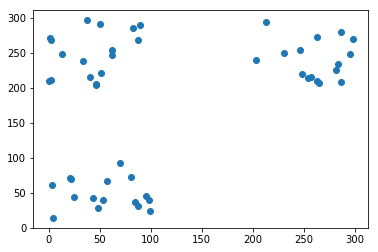

In [9]:
# menampilkan scatter plot
plt.plot(dataa.X1,dataa.X2,'o')
plt.show()

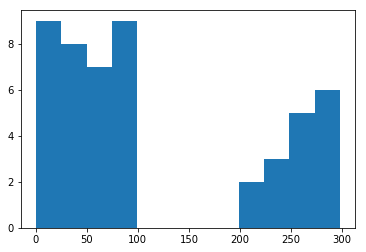

In [10]:
# menampilkan histogram peubah X1
plt.hist(dataa.X1,bins=12)
plt.show()

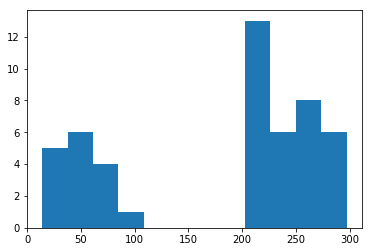

In [11]:
# menampilkan histogram peubah X2
plt.hist(dataa.X2,bins=12)
plt.show()

________

# ALGORITMA KMEANS

___________

In [12]:
# library kmeans
from sklearn.cluster import KMeans

In [13]:
# membangun algoritma kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# menampilkan keanggotaan dari hasil clsutering dengan kmeans 
print("keanggotaan cluster:\n",kmeans.labels_)

keanggotaan cluster:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
# memprediksi keanggotaan dari hasil clsutering dengan kmeans
print(kmeans.predict(dataa))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]


In [16]:
# menambahkan keanggotaan hasil clsutering pada data
dataa['cluster']=kmeans.predict(dataa)

In [17]:
# membagi-bagi data frame berdasarkan cluster yang terbentuk
clus1=dataa[dataa.cluster==0]
clus2=dataa[dataa.cluster==1]
clus3=dataa[dataa.cluster==2]

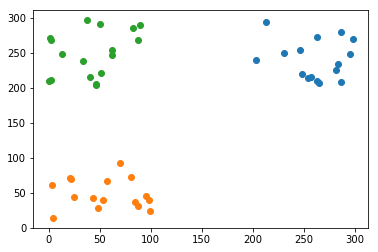

In [18]:
# menampilkan scatter plot beserta clsuternya berdasarkan warna tertentu
plt.plot(clus1.X1,clus1.X2,"o")
plt.plot(clus2.X1,clus2.X2,"o")
plt.plot(clus3.X1,clus3.X2,"o")
plt.show()

In [19]:
# melihat deskripsi masing-masing clsuter
print(clus1.describe());print(clus2.describe());print(clus3.describe())

              X1         X2  cluster
count   16.00000   16.00000     16.0
mean   260.75000  240.43750      0.0
std     27.93922   27.94511      0.0
min    203.00000  207.00000      0.0
25%    247.50000  215.75000      0.0
50%    263.00000  237.50000      0.0
75%    283.75000  258.00000      0.0
max    298.00000  294.00000      0.0
              X1         X2  cluster
count  16.000000  16.000000     16.0
mean   55.812500  48.687500      1.0
std    33.558345  21.406288      0.0
min     3.000000  14.000000      1.0
25%    24.250000  35.500000      1.0
50%    55.000000  43.000000      1.0
75%    85.750000  67.500000      1.0
max    99.000000  93.000000      1.0
              X1          X2  cluster
count  17.000000   17.000000     17.0
mean   41.705882  248.823529      2.0
std    30.252613   32.659676      0.0
min     0.000000  205.000000      2.0
25%    13.000000  216.000000      2.0
50%    46.000000  248.000000      2.0
75%    62.000000  272.000000      2.0
max    90.000000  297.000000  

# Algoritma KMeans dengan Standardisasi

In [20]:
# library untuk standardisasi
from sklearn.preprocessing import StandardScaler

In [21]:
# menerapkan standardisasi
X = dataa[['X1','X2']]

# metode standardiasi Z = (X-miu) / std
sc = StandardScaler()

# standardisasi berdasarkan data X
sc.fit(X)

# standardisasi data
X = sc.transform(X)

In [22]:
# membangun algoritma kmeans menggunakan data yang distandardisasi
kmeans2 = KMeans(n_clusters=3, random_state=11)
kmeans2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

In [23]:
# menampilkan keanggotaan dari hasil clsutering dengan kmeans
print(kmeans2.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]


In [24]:
# menambahkan keanggotaan hasil clsutering kmeans dengan standardisasi pada data
dataa['cluster_std']=kmeans2.labels_

In [25]:
# menampilkan data
dataa.head()

,X1,X2,cluster,cluster_std
0,85,37,1,1
1,95,45,1,1
2,88,31,1,1
3,22,69,1,1
4,21,71,1,1


In [26]:
# memilih warna pada masing-masing kelompok
colormap = np.array(['red','blue','green'])

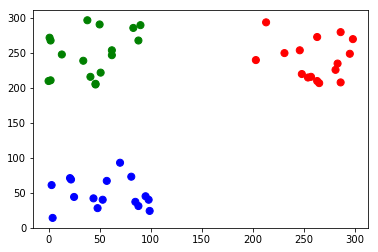

In [27]:
# menampilkan scatter plot beserta clsuternya berdasarkan warna tertentu
plt.scatter(dataa.X1,dataa.X2,c=colormap[dataa['cluster_std']]
            ,marker='o',s=50)
plt.show()

____________

# Menentukan Banyaknya Cluster

____________-

# K-MEAN : Metode Elbow 

In [28]:
# library untuk menghitung jarak antar amatan
from scipy.spatial.distance import cdist, pdist

In [29]:
# banyaknya cluster dan centroids
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [30]:
# within sumsq
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [31]:
# variance explained
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

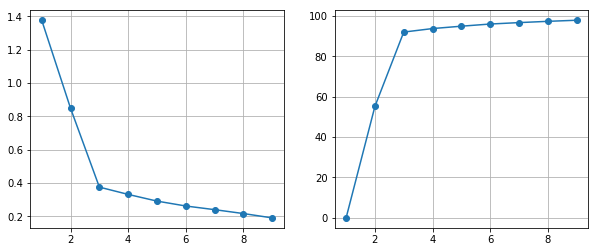

In [32]:
plt.figure(figsize=(10,4))

# menampilkan plot antara within sumsquare dan banyaknya cluster
plt.subplot(1,2,1)
plt.plot(K,avgWithinSS,'o-')
plt.grid(True)

# menampilkan plot antara keragaman yang dijelaskan dan banyaknya cluster
plt.subplot(1,2,2)
plt.plot(K,varExplained,'o-')
plt.grid(True)

plt.show()

# KMEANS : Metode Silhouette

In [33]:
# library untuk menghitung skor silhouette 
from sklearn.metrics import silhouette_score

In [34]:
# menyediakan tempat untuk skor silhouette
score = []

# menghitung skor silhouette untuk masing-masing jumlah cluster
for n_clusters in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(X,labels,metric='euclidean'))

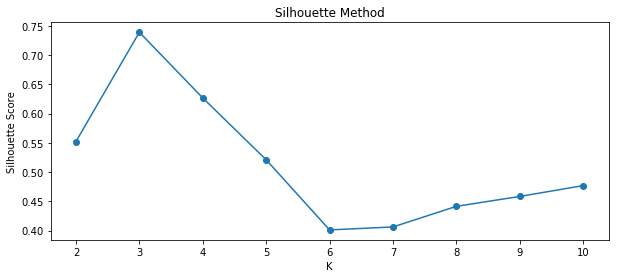

In [35]:
# mengatur ukuran jendela
plt.figure(figsize=(10,4))

# menampilkan scatter
plt.plot([2,3,4,5,6,7,8,9,10],score,"o-")

# menambahkan label pada sumbu y
plt.ylabel("Silhouette Score")

# menambahkan label pada sumbu x
plt.xlabel("K")

# menambahkan judul
plt.title("Silhouette Method")

plt.show()